# Bond Biography: The Currency Sixes

## Overview: (Crocker, 2014)
The Currency Sixes bonds were instrumental in financing the construction of the Transcontinental Railroads in the United States. These bonds played a crucial role in the economic development of the country during the 19th century.

## Features of the Bond: (Crocker, 2014)
- **Issue Date:** The Currency Sixes were issued between 1862 and 1869.
- **Coupon Rate:** These bonds had a coupon rate of 6%, paid semi-annually.
- **Maturity Date:** The bonds had varied maturity dates, typically ranging from 10 to 30 years.
- **Principal Value:** The bonds were typically issued with a principal value of $1,000.
- **Call Features:** The bonds were callable after 10 years.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
from ipywidgets import interact, widgets, fixed
import numpy as np

In [3]:
prices_file_path = 'data/Macaulay_table2_railroad_bond_prices.xlsx'
yields_file_path = 'data/Macaulay_table3_railroad_bond_yields.xlsx'

bond_prices = pd.read_excel(prices_file_path)
bond_yields = pd.read_excel(yields_file_path)

# function to clean data by dropping first row, creating a year column, converting columns to numeric and more.
def clean_bond_data(df):
    df = df.drop(0)
    df['Unnamed: 0'].fillna(method='ffill', inplace=True)
    df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True) 
    df['No.'] = df['No.'].str.replace('Febuary', 'February')
    df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['No.'], errors='coerce')
    # Exclude non-numeric columns
    numeric_columns = [col for col in df.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    return df

bond_prices = clean_bond_data(bond_prices)
bond_yields = clean_bond_data(bond_yields)

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_41870/2237179088.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Unnamed: 0'].fillna(method='ffill', inplace=True)  # Forward fill missing years
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_41870/2237179088.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['

In [4]:
notable_events = [
    {'date': '1862-07-01', 'event': 'Pacific Railway Act'},
    {'date': '1864-07-02', 'event': '1864 Amendment'},
    {'date': '1869-05-10', 'event': 'Completion of Transcontinental Railroad'},
    {'date': '1873-09-18', 'event': 'Panic of 1873'}
]

# adding notable events to bond prices and yields dataframes
def add_notable_events(df, events):
    for event in events:
        if pd.to_datetime(event['date']) not in df['Date'].values:
            df = pd.concat([df, pd.DataFrame({'Date': [pd.to_datetime(event['date'])]})], ignore_index=True)
    df = df.sort_values(by='Date').reset_index(drop=True)
    df = df.interpolate()
    return df

bond_prices = add_notable_events(bond_prices, notable_events)
bond_yields = add_notable_events(bond_yields, notable_events)

/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_41870/1580707901.py:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()  # Interpolate missing data
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_41870/1580707901.py:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()  # Interpolate missing data


## Purpose of Issuance: (Crocker, 2014)
The primary purpose of issuing the Currency Sixes was to fund the construction of the Transcontinental Railroads, which were essential for connecting the eastern and western United States. This infrastructure project facilitated trade, travel, and economic expansion across the country.

## Amount Authorized and Sold: (Treasury Direct)
Congress authorized a substantial amount of these bonds, with approximately $64 million in bonds being sold to finance the railroads. The total amount sold varied over the years, reflecting the ongoing funding needs of the railroad construction.

## Original Sale Price and Secondary Market Price History: (Fleisig, 2010)
The bonds were originally sold at par value, $1,000. The price trends of the Currency Sixes bonds show significant fluctuations over time, influenced by various factors including economic conditions, investor confidence, and the progress of the railroad projects. Prices in the secondary market varied, sometimes trading at a premium or discount to par value, depending on market conditions.

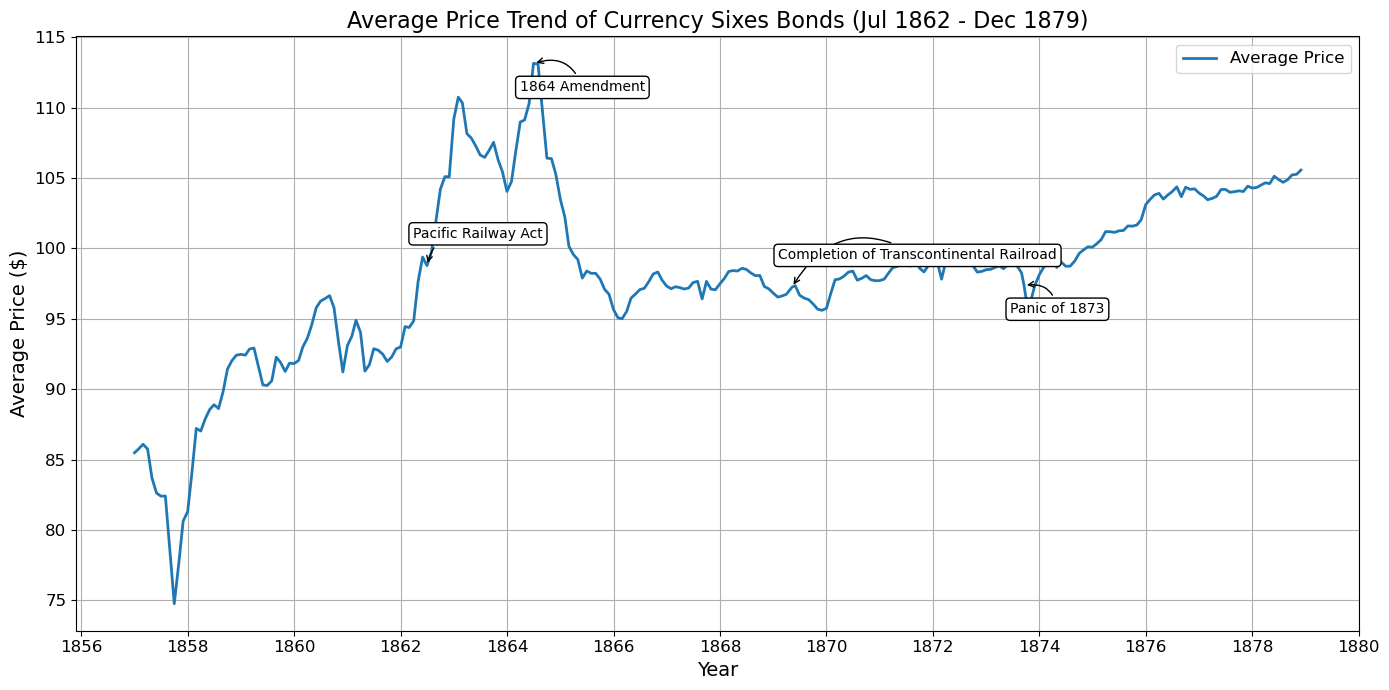

In [5]:
# function to plot average price
def plot_average_price():
    avg_price = bond_prices[[col for col in bond_prices.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]].mean(axis=1)
    plt.figure(figsize=(14, 7))
    plt.plot(bond_prices['Date'], avg_price, label='Average Price', linewidth=2)
    
    for i, event in enumerate(notable_events):
        event_date = pd.to_datetime(event['date'])
        y_pos = avg_price[bond_prices['Date'] == event_date].values[0]
        
        # adjust text postiion so it doesn't block arrow
        offset = 20 if i % 2 == 0 else -20
        plt.annotate(event['event'], xy=(event_date, y_pos),
                     xytext=(-10, offset), textcoords='offset points',
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5", color="black"))

    plt.title('Average Price Trend of Currency Sixes Bonds (Jul 1862 - Dec 1879)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Price ($)', fontsize=14)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(YearLocator(2))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    
plot_average_price()

## Redemption: (Crocker, 2014), (Vance, 2024)
The Currency Sixes were eventually redeemed by the U.S. government, typically at par value. The redemption of these bonds was a significant financial event, marking the completion of the funding for the Transcontinental Railroads.

## Investors (Done by AI till we get a concrete Source)

The Currency Sixes were purchased by a variety of investors, each drawn by the security and stability offered by these bonds.

### Financial Institutions
- **Banks and Investment Firms**: Financial institutions were key purchasers of Currency Sixes. Banks and investment firms sought secure, government-backed investments to balance their portfolios. The first-mortgage status of these bonds provided a reliable return on investment, making them a preferred choice for institutions looking for stability.
- **Risk Management**: For financial institutions, managing risk is crucial. Currency Sixes offered a low-risk investment with a guaranteed priority in repayment, which helped these institutions maintain a stable financial base.
- **Portfolio Diversification**: These bonds were an essential part of portfolio diversification strategies, helping financial institutions mitigate risk across different asset classes.

### Private Investors
- **Wealthy Individuals**: Private investors, particularly wealthy individuals, were drawn to Currency Sixes for their long-term, stable returns. The secure nature of these bonds made them an ideal investment for individuals looking to preserve and grow their wealth with minimal risk.
- **Stable Income**: Currency Sixes provided a reliable source of income, which was especially appealing to private investors seeking stable returns in uncertain economic times.
- **Legacy Planning**: For many private investors, Currency Sixes were a part of legacy planning, ensuring financial security for future generations.

### Foreign Investors
- **International Buyers**: Foreign investors were particularly attracted to the stability and backing of the U.S. government. The first-mortgage status and government support of these bonds provided a level of security that was appealing to international buyers.
- **Economic Stability**: The crucial role of the railroads in economic expansion made these bonds even more attractive. Foreign investors saw the potential for growth in the U.S. economy, supported by the development of its infrastructure.
- **Diversification of Holdings**: Investing in Currency Sixes allowed foreign investors to diversify their holdings and reduce exposure to their domestic markets. This diversification was a key strategy for managing international investment risk.

## Yield Trends: (Weidenmier)
The yield trends of the Currency Sixes bonds reflect the return on investment for bondholders. These trends were influenced by various factors, including economic conditions, investor sentiment, and the progress of the railroad projects.

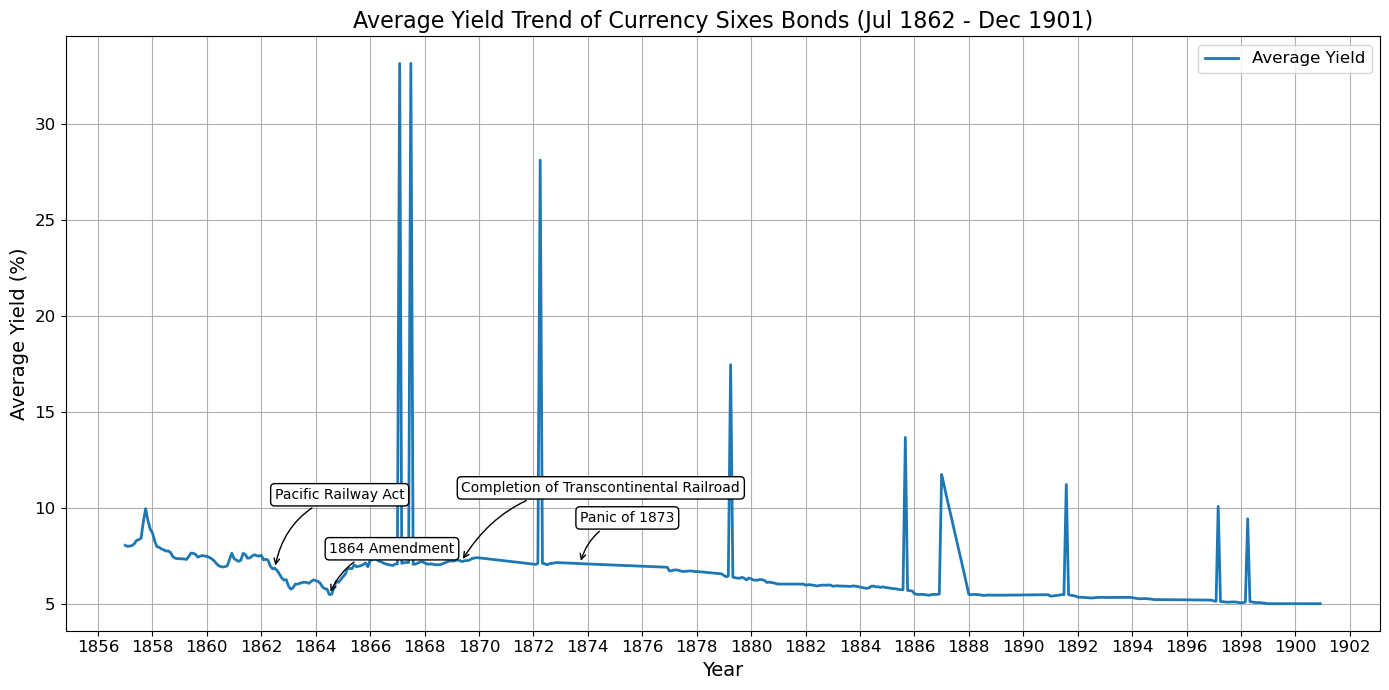

In [6]:
# function to plot average yield
def plot_average_yield():
    avg_yield = bond_yields[[col for col in bond_yields.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]].mean(axis=1)
    avg_yield = avg_yield.ffill()
    plt.figure(figsize=(14, 7))
    plt.plot(bond_yields['Date'], avg_yield, label='Average Yield', linewidth=2)
    
    # custom annotations for each event
    annotations = {
        'Pacific Railway Act': {'offset': (0, 50), 'rad': 0.3},
        '1864 Amendment': {'offset': (0, 30), 'rad': 0.3}, 
        'Completion of Transcontinental Railroad': {'offset': (0, 50), 'rad': 0.3},
        'Panic of 1873': {'offset': (0, 30), 'rad': 0.3} 
    }

    for event in notable_events:
        event_date = pd.to_datetime(event['date'])
        y_pos = avg_yield[bond_yields['Date'] == event_date].values[0]
        offset = annotations[event['event']]['offset']
        rad = annotations[event['event']]['rad']

        plt.annotate(event['event'], xy=(event_date, y_pos),
                     xytext=offset, textcoords='offset points',
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
                     arrowprops=dict(arrowstyle="->", connectionstyle=f"arc3,rad={rad}"))

    plt.title('Average Yield Trend of Currency Sixes Bonds (Jul 1862 - Dec 1901)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Yield (%)', fontsize=14)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(YearLocator(2))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

plot_average_yield()

## Marketability: (Crocker, 2014), (DeMatos, 2023)

The Currency Sixes were set at a first-mortgage status over government-issued bonds after 1864 amendment legislation. First-mortgage status, or first lien, meant that in the event of a default, these bonds would be paid back before government-issued bonds.

The key here was to create a more secure bond that appealed to a wider range of investors with lower risk tolerance, which increased the pool of potential buyers. By balancing the financial burden between the government and the private sector, the government could indirectly support private enterprises for the war without direct expenditure.

To raise the appeal towards investors, the federal government granted land to the railroads along the rights of way:

- 200 feet on each side of the track
- Sections 10 miles square alternating on each side

**Note:** Union Pacific had a difficult time gathering investments to repay. Ten thousand shares of $1,000 each were needed to be issued (only 10% had to be paid at the time of subscription). However, only 31 shares were established despite marketing in 24 cities.

**Example:** Railway executive Thomas C. Durant stepped in to promote shares of the Union Pacific. He put up the first installment of 10% himself and guaranteed investors against their loss on investment, eventually selling 2,177 shares by October 29, 1863.

Large private investors, usually the executive leaders of the railroads, were tasked with promoting shares of their own projects. In this way, they were able to convince their acquaintances and others potentially interested to invest.

## Pricing: (Crocker, 2014)
- Various amounts of the loan were based on the geographical difficulty of building the railroads.
- Failure to complete the tracks by January 1, 1874, resulted in forfeiture of rights.
- 'Easy Grade' was 16,000 dollars per mile [gentle slopes].
- 'Moderate' was 32,000 dollars per mile.
- 'Mountainous' was 48,000 dollars per mile.
- The point of these prices could have been an incentive for the builders to finish the entire commissioned project instead of seeking small profits, thus creating a more sustainable source of funding for the investment.

## Historical Context: (Weidenmier), (Gallman, 1992)
The issuance and performance of the Currency Sixes bonds were closely tied to the economic and political landscape of the time. Key events such as the Civil War, the Panic of 1873, and other economic crises affected the bond market and investor sentiment.

## Notable Events: (National Archives and Records Administration), (Crocker, 2014)
- **Pacific Railway Act (1862):** This act facilitated the issuance of bonds to finance the construction of the Transcontinental Railroad.
- **1864 Amendment to the Pacific Railway Act:** This amendment provided additional support and resources for the railroad construction, impacting the allocation and issuance of bonds.
- **Panic of 1873:** This financial crisis led to significant fluctuations in bond prices as investors reacted to the economic downturn.
- **Completion of the Transcontinental Railroad:** The successful completion of the railroad projects boosted investor confidence and supported the bond prices.

## Conclusion
The Currency Sixes bonds were an important financial instrument in the history of the United States. Their role in funding the Transcontinental Railroads and their impact on the economic development of the country show the importance of these bonds in American history.

In [7]:
# plotting function to plot a graph of all the bonds' yield and price, as well as individual yields/prices
def plot_trends(view_type, bond_id=None):
    plt.figure(figsize=(14, 7))
    
    if view_type == 'Combined Price':
        for column in [col for col in bond_prices.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]:
            plt.plot(bond_prices['Date'], bond_prices[column], label=f'Bond {column}', linewidth=1)
        plt.title('Price Trends of All Currency Sixes Bonds Over Time', fontsize=16)
        plt.ylabel('Price ($)', fontsize=14)
        
    elif view_type == 'Combined Yield':
        for column in [col for col in bond_yields.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]:
            bond_yields[column] = bond_yields[column].fillna(method='ffill')
            plt.plot(bond_yields['Date'], bond_yields[column], label=f'Bond {column}', linewidth=1)
        plt.title('Yield Trends of All Currency Sixes Bonds Over Time', fontsize=16)
        plt.ylabel('Yield (%)', fontsize=14)
        
    elif view_type == 'Individual Price' and bond_id:
        plt.plot(bond_prices['Date'], bond_prices[bond_id], label=f'Bond {bond_id}', linewidth=2)
        plt.title(f'Price Trend of Bond {bond_id} Over Time', fontsize=16)
        plt.ylabel('Price ($)', fontsize=14)
        
    elif view_type == 'Individual Yield' and bond_id:
        plt.plot(bond_yields['Date'], bond_yields[bond_id], label=f'Bond {bond_id}', linewidth=2)
        plt.title(f'Yield Trend of Bond {bond_id} Over Time', fontsize=16)
        plt.ylabel('Yield (%)', fontsize=14)
        
    plt.xlabel('Year', fontsize=14)
    plt.legend(title='Bond ID', loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# dropdown menu to sort through options
def display_graphs(view_type):
    if view_type in ['Combined Price', 'Combined Yield']:
        plot_trends(view_type)
    elif view_type in ['Individual Price', 'Individual Yield']:
        bond_dropdown = widgets.Dropdown(options=[col for col in bond_prices.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']], description='Bond ID:')
        interact(plot_trends, view_type=fixed(view_type), bond_id=bond_dropdown)

view_options = ['Combined Price', 'Combined Yield', 'Individual Price', 'Individual Yield']
view_dropdown = widgets.Dropdown(options=view_options, description='View:')
interact(display_graphs, view_type=view_dropdown)

interactive(children=(Dropdown(description='View:', options=('Combined Price', 'Combined Yield', 'Individual P…

<function __main__.display_graphs(view_type)>

## Sources
List of sources we used to write our bond biography

- BARRIGER, J. W., & McNamara, R. S. (1965). Railroads in the Civil War. National Defense Transportation Journal, 21(2), 42–48. http://www.jstor.org/stable/44097985
- Crocker, E. B. (2014, April 17). Financing America’s First Transcontinental Railroad. Beyond the History Textbooks. https://beyondthehistorytextbooks.com/2014/04/17/financing-americas-first-transcontinental-railroad/ 
- Daniel DeMatos, C. (2023b, February 27). TCH: Financing and Building Union Pacific. LinkedIn. https://www.linkedin.com/pulse/tch-financing-building-union-pacific-daniel-dematos-cfa/ 
- Fleisig, H. (2010). The Central Pacific Railroad and the railroad land grant controversy. The Journal of Economic History. Cambridge University Press. https://doi.org/10.1017/S0022050700097201
- Gallman, R. E., & Wallis, J. J. (1992). U. S. labor force estimates and economic growth, 1800- ... nber.org. https://www.nber.org/system/files/chapters/c8007/c8007.pdf 
- Mulopulos, S. (2024, February 20). Rediscovering the readjusters: Remembering a lost multiracial, working-class movement. American Affairs Journal. https://americanaffairsjournal.org/2024/02/rediscovering-the-readjusters-remembering-a-lost-multiracial-working-class-movement/ 
- National Archives and Records Administration. (n.d.). Pacific Railway Act (1862). National Archives and Records Administration. https://www.archives.gov/milestone-documents/pacific-railway-act 
- Poor, H. V. (1879). The Pacific Railroad. The North American Review, 128(271), 664–680. http://www.jstor.org/stable/25100767
- Russel, R. R. (1928). A Revaluation of the Period Before the Civil War: Railroads. The Mississippi Valley Historical Review, 15(3), 341–354. https://doi.org/10.2307/1892434
- The history of the debt. TreasuryDirect. (n.d.). https://www.treasurydirect.gov/government/historical-debt-outstanding/
- Vance, J. E. , Allen, . Geoffrey Freeman and Shedd, . Thomas Clark (2024, July 3). railroad. Encyclopedia Britannica. https://www.britannica.com/technology/railroad
- Weidenmier, M. D., & Davis, J. H. (n.d.). The macroeconomic impact of the American Civil War. atlantafed.org. https://www.atlantafed.org/blogs/-/media/CFBC939B67FA46169DA711319F15FDD2.ashx 